In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # cechy: długość i szerokość działki oraz płatków
y = iris.target  # etykiety: gatunki (0: Setosa, 1: Versicolor, 2: Virginica)

# Wybór tylko dwóch klas, aby uprościć problem do regresji logistycznej
X = X[y != 2]
y = y[y != 2]

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konwersja danych na tensory
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [3]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Inicjalizacja modelu
model = LogisticRegressionModel(X_train.shape[1])

In [4]:
# Funkcja kosztu: Binary Cross-Entropy (log loss)
criterion = nn.BCELoss()

# Optymalizator: Stochastic Gradient Descent (SGD)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()

    # Przewidywania
    y_pred = model(X_train_tensor)

    # Obliczenie kosztu
    loss = criterion(y_pred, y_train_tensor)

    # Zerowanie gradientów
    optimizer.zero_grad()

    # Obliczanie gradientów
    loss.backward()

    # Aktualizacja wag
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 100/1000, Loss: 0.6900
Epoch 200/1000, Loss: 0.5070
Epoch 300/1000, Loss: 0.3995
Epoch 400/1000, Loss: 0.3316
Epoch 500/1000, Loss: 0.2854
Epoch 600/1000, Loss: 0.2522
Epoch 700/1000, Loss: 0.2271
Epoch 800/1000, Loss: 0.2074
Epoch 900/1000, Loss: 0.1916
Epoch 1000/1000, Loss: 0.1785


In [6]:
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_class = (y_test_pred >= 0.5).float()
    accuracy = (y_test_pred_class == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 100.00%


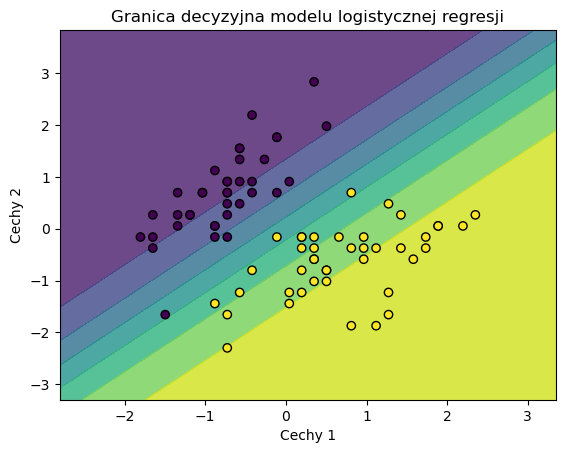

In [7]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    
    with torch.no_grad():
        Z = model(grid_tensor)
        Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Cechy 1')
    plt.ylabel('Cechy 2')
    plt.title('Granica decyzyjna modelu logistycznej regresji')
    plt.show()

# Wykres granicy decyzyjnej
plot_decision_boundary(model, X_train, y_train)